In [10]:
from mlxtend.frequent_patterns import association_rules
import pyfpgrowth as fpg
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
# %matplotlib notebook 

In [11]:
associationRules = pd.read_excel('association-rules.xlsx')

In [12]:
pd.set_option('display.max_colwidth', -1)
associationRules.sort_values(by = ['lift'], ascending=False)

antecedants  \
3912   [u'demand_draft', u'overdraft', 'male', u'credit_card']         
3947   ['10k-20k', 'non-owner', u'Home_loan']                          
3916   [u'demand_draft', u'Home_loan', 'male', u'credit_card']         
3943   [u'overdraft', 'non-owner', '10k-20k']                          
3948   ['male', 'non-owner', u'Home_loan']                             
3911   [u'demand_draft', u'overdraft', '10k-20k', u'credit_card']      
3915   [u'demand_draft', u'Home_loan', '10k-20k', u'credit_card']      
3944   [u'overdraft', 'male', 'non-owner']                             
3937   ['male', 'non-owner', u'credit_card']                           
3922   [u'demand_draft', u'overdraft', '10k-20k', u'Home_loan']        
3945   [u'demand_draft', 'male', u'Home_loan']                         
3914   [u'overdraft', '10k-20k', 'non-owner', u'credit_card']          
3934   [u'demand_draft', 'male', u'credit_card']                       
3925   [u'overdraft', '10k-20k', 'non-owner', u'Home_loan']            
3923   [u'demand_draft', u'overdraft', 'male', u'Home_loan']           
3936   ['10k-20k', 'non-owner', u'credit_card']                        
11042  [u'Recurrarent Deposit', u'overdraft', u'credit_card']          
3919   [u'Home_loan', 'non-owner', '10k-20k', u'credit_card']          
3940   [u'demand_draft', u'overdraft', 'male']                         
3155   [u'savings_account', u'Home_loan', 'male', u'credit_card']      
3171   [u'overdraft', 'non-owner', '10k-20k']                          
10539  ['middle', u'overdraft', 'non-owner', u'credit_card']           
1765   [u'demand_draft', 'male', 'young']                              
1762   [u'savings_account', 'non-owner', u'credit_card']               
860    [u'demand_draft', 'male', 'young']                              
859    [u'overdraft', u'savings_account', 'non-owner']                 
3153   [u'overdraft', 'male', u'savings_account', u'credit_card']      
3174   ['10k-20k', 'non-owner', u'Home_loan']                          
11045  [u'Recurrarent Deposit', u'overdraft', u'Home_loan']            
1581   ['val_30-40', u'motor_general_insurance', 'female']             
...                                                    ...             
10358  [u'demand_draft', 'cash', 'non-owner']                          
2242   [u'demand_draft', u'savings_account', 'non-owner']              
2240   [u'demand_draft', u'savings_account', 'non-owner', '10k-20k']   
8771   ['non-owner', 'cheque']                                         
5925   [u'demand_draft', 'non-owner', '10k-20k']                       
7914   [u'demand_draft', 'young', 'non-owner', '10k-20k']              
2028   [u'motor_general_insurance', 'non-owner', u'Home_loan']         
3894   ['male', 'val_10-20', '20k-30k']                                
10683  [u'pension_life_insurance', '10k-20k']                          
9640   ['val_30-40', 'female']                                         
7501   ['male', 'val_20-30', '10k-20k']                                
2475   ['val_30-40', '20k-30k', 'non-owner']                           
7653   ['val_20-30', '10k-20k']                                        
6604   ['middle', 'male']                                              
4746   [u'funds_transfer', 'val_30-40', 'female']                      
10687  ['val_30-40', 'non-owner', '10k-20k']                           
7296   ['val_20-30', '10k-20k']                                        
2476   ['val_30-40', '20k-30k', 'female']                              
7502   ['val_20-30', '10k-20k']                                        
9459   ['elder', 'cash', 'non-owner']                                  
10418  ['cash', 'non-owner', '10k-20k']                                
10261  ['home-owner', 'val_20-30']                                     
3895   ['val_10-20', '20k-30k']                                        
10420  ['cash', 'non-owner']                                           
10096  ['home-owner', u'o

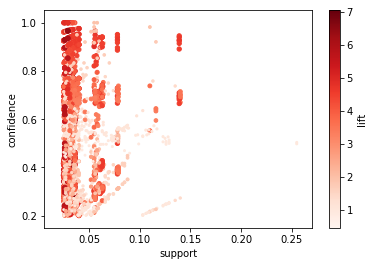

In [13]:
# plt.figure(figsize=(20,10))
fig = plt.figure('scatter: support v confidence')
plt.xlabel("support")
plt.ylabel("confidence")
axis = fig.add_subplot(111)
s = [4*i for i in associationRules.lift]
sc = axis.scatter(x = associationRules['support'], y = associationRules['confidence'], c=associationRules.lift, s=s, cmap=mpl.cm.Reds) #get the current axes
plt.colorbar(sc).set_label("lift")
plt.show()

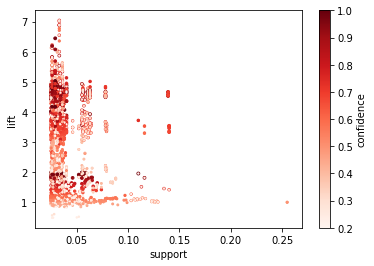

In [14]:
fig = plt.figure('scatter: support v lift')
plt.xlabel("support")
plt.ylabel("lift")
axis = fig.add_subplot(111)
s = [8*i for i in associationRules.confidence]
sc = axis.scatter(x = associationRules['support'], y = associationRules['lift'], c=associationRules['confidence'], s=s, cmap=mpl.cm.Reds) #get the current axes
plt.colorbar(sc).set_label("confidence")
plt.show()

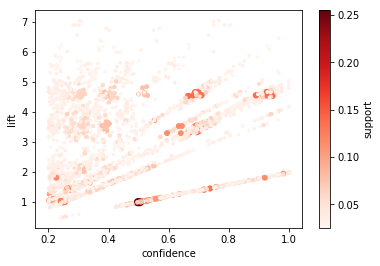

In [15]:
fig = plt.figure('scatter: confidence v lift')
plt.xlabel("confidence")
plt.ylabel("lift")
axis = fig.add_subplot(111)
s = [200*i for i in associationRules.support]
sc = axis.scatter(x = associationRules['confidence'], y = associationRules['lift'], c=associationRules['support'], s=s, cmap=mpl.cm.Reds) #get the current axes
plt.colorbar(sc).set_label("support")
plt.show()

In [16]:
order = []
for i, row in associationRules.iterrows():
    l = len(list(ast.literal_eval(associationRules.loc[i,'antecedants'])))
    l += len(list(ast.literal_eval(associationRules.loc[i,'consequents'])))
    order.append(l)

In [17]:
# fig = plt.figure('order: confidence v support')
# plt.xlabel("confidence")
# plt.ylabel("support")
# axis = fig.add_subplot(111)
# sc = axis.scatter(x = associationRules['support'], y = associationRules['confidence'], c=order, s=6, cmap=mpl.cm.Reds) #get the current axes
# plt.colorbar(sc).set_label("order")
# plt.show()

In [19]:
import ast
keepIndices = []
traits = {'cardid','male','female','young','middle','elder','home-owner','non-owner','cheque','cash','10k-20k','20k-30k'}

i = 0
for k,_ in associationRules.iterrows():
    print associationRules.loc[k,'consequents']
    consequent = list(ast.literal_eval(associationRules.loc[i,'consequents']))

['non-owner']
[u'savings_account', 'non-owner']
['non-owner']
['non-owner', '10k-20k']
['male', '10k-20k']
[u'overdraft', '10k-20k']
[u'overdraft', 'male']
[u'demand_draft', 'non-owner']
['non-owner']
['10k-20k', u'Home_loan']
[u'overdraft', '10k-20k']
[u'demand_draft', 'non-owner']
['male', u'Home_loan']
['10k-20k', u'credit_card']
['non-owner']
['male', u'credit_card']
['non-owner']
['female']
['home-owner', 'female']
['home-owner', '20k-30k']
['non-owner']
['10k-20k', u'credit_card']
['male', u'credit_card']
['male', 'cash']
['10k-20k', u'Home_loan']
['male', u'Home_loan']
['10k-20k', 'cash', u'credit_card']
['male', 'cash', u'credit_card']
[u'credit_card', '10k-20k', u'Home_loan']
['10k-20k', 'cash', u'Home_loan']
['male', 'cash', u'Home_loan']
['male', '10k-20k']
['male', u'credit_card']
[u'overdraft', '10k-20k']
['non-owner']
['10k-20k', u'credit_card']
['male', u'credit_card']
[u'overdraft', '10k-20k']
[u'overdraft', 'male']
[u'pension_life_insurance', '10k-20k']
[u'overdraft', 

['elder', 'non-owner']
['male', u'Home_loan']
['non-owner']
['non-owner']
['female']
['non-owner']
[u'motor_general_insurance', 'female']
[u'motor_general_insurance', '20k-30k']
[u'savings_account', 'female']
['female', 'non-owner']
['20k-30k', 'non-owner']
[u'savings_account', 'non-owner']
['non-owner']
['non-owner']
['male', 'cash']
['female']
['non-owner']
['female', 'non-owner']
['20k-30k', 'non-owner']
[u'demand_draft', '20k-30k']
[u'funds_transfer', 'female']
[u'funds_transfer', '20k-30k']
['female']
['male', '20k-30k']
['male', u'Home_loan']
[u'overdraft', '10k-20k']
['male', '10k-20k']
['10k-20k', u'Home_loan']
[u'overdraft', '10k-20k']
['non-owner']
['non-owner']
['non-owner', '10k-20k']
['male', 'non-owner']
[u'overdraft', '10k-20k']
['middle', 'male']
[u'overdraft', 'non-owner', '10k-20k']
['non-owner']
['10k-20k', u'credit_card']
['10k-20k', u'Home_loan']
[u'demand_draft', 'non-owner']
['male', '10k-20k']
['10k-20k', u'credit_card']
[u'overdraft', '10k-20k']
['male', 'cash'

['home-owner', '10k-20k', 'elder']
['home-owner', 'male', u'credit_card']
['home-owner', '10k-20k', u'credit_card']
['home-owner', u'overdraft', 'male']
['home-owner', u'overdraft', '10k-20k']
['non-owner']
['cash', 'non-owner']
['female']
['home-owner', 'female']
['young', '10k-20k']
[u'overdraft', 'male']
['10k-20k', u'credit_card']
['non-owner']
[u'motor_general_insurance', 'female']
['non-owner']
[u'overdraft', 'male']
['non-owner']
['non-owner']
['non-owner']
[u'savings_account', 'young']
[u'demand_draft', 'non-owner', u'credit_card']
['non-owner']
['non-owner']
['10k-20k', u'Home_loan']
[u'overdraft', '10k-20k']
[u'overdraft', 'male']
['female']
['non-owner']
[u'savings_account', 'female']
[u'savings_account', 'non-owner']
['female']
[u'motor_general_insurance', 'female']
[u'motor_general_insurance', '20k-30k']
[u'funds_transfer', 'female']
[u'funds_transfer', '20k-30k']
[u'motor_general_insurance', 'cash', 'female']
[u'motor_general_insurance', '20k-30k', 'cash']
[u'funds_transf

['non-owner']
['male', '10k-20k']
['elder', 'non-owner']
['non-owner']
['elder', 'non-owner']
['non-owner']
['cash', 'non-owner']
['male', u'Home_loan']
['elder', 'non-owner']
['non-owner']
['non-owner', '10k-20k']
['young', '10k-20k']
['male', 'non-owner']
[u'overdraft', 'male']
['10k-20k', u'credit_card']
['male', u'credit_card']
[u'overdraft', '10k-20k']
[u'overdraft', 'male']
['non-owner']
['male', 'non-owner']
['elder', 'non-owner']
['male', u'credit_card']
[u'overdraft', 'male']
['non-owner']
['male', 'non-owner']
['non-owner', '10k-20k']
['male', '10k-20k']
['middle', 'male']
['male', u'Home_loan']
['10k-20k', u'Home_loan']
[u'overdraft', 'male']
[u'overdraft', '10k-20k']
['male', 'non-owner', u'Home_loan']
['10k-20k', 'non-owner', u'Home_loan']
['middle', 'male', u'Home_loan']
['middle', '10k-20k', u'Home_loan']
[u'overdraft', 'male', 'non-owner']
[u'overdraft', 'non-owner', '10k-20k']
['middle', u'overdraft', 'male']
['middle', u'overdraft', '10k-20k']
[u'overdraft', '10k-20k'

[u'funds_transfer', 'elder', '20k-30k']
[u'funds_transfer', u'motor_general_insurance', 'female']
[u'funds_transfer', u'motor_general_insurance', '20k-30k']
['elder', u'motor_general_insurance', 'female']
['elder', u'motor_general_insurance', '20k-30k']
[u'funds_transfer', 'home-owner', 'female']
[u'funds_transfer', 'home-owner', '20k-30k']
['home-owner', 'female', 'elder']
['home-owner', '20k-30k', 'elder']
['home-owner', u'motor_general_insurance', 'female']
['home-owner', u'motor_general_insurance', '20k-30k']
['female']
['female']
['male', '10k-20k']
['male', u'Home_loan']
['10k-20k', u'Home_loan']
[u'overdraft', 'male']
[u'overdraft', '10k-20k']
['male', u'credit_card']
['10k-20k', u'credit_card']
['elder', 'male', u'Home_loan']
['elder', '10k-20k', u'Home_loan']
['elder', u'overdraft', 'male']
['elder', u'overdraft', '10k-20k']
[u'overdraft', 'male', u'Home_loan']
[u'overdraft', '10k-20k', u'Home_loan']
['elder', 'male', u'credit_card']
['elder', '10k-20k', u'credit_card']
[u'Hom